## <center> <font color='Brown'> PUBG GAME Prediction </font></center>

<center><img src= "C:\Users\hp\Downloads\jupyter\images(1).jpeg"></center>

### Table Contents
1. [Importing Libraries](#import)
2. [Reading the data](#read)
3. [Data Description](#data)
4. [Data Wrangling](#wrang)

### <font color='green'> Importing Libraries<a class='anchor' id='import'></font>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(16,6)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import catboost as cb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

### <font color='Green'>Reading of Data<a class='anchor' id='read'></font>

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\jupyter\PUBG_Game_Prediction_data.csv.zip")

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
df.shape

(4446966, 29)

A very large dataset to work upon!

### <font color='brown'>Data Description<a class='anchor' id='data'></font>

**-** DBNOs - Number of enemy players knocked.

**-**  assists - Number of enemy players this player damaged that were killed by teammates.

**-** boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

Id - Player’s Id

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

killStreaks - Max number of enemy players killed in a short amount of time.

kills - Number of enemy players killed.

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchDuration - Duration of match in seconds.

matchId - ID to identify match. There are no matches that are in both the training and testing set.

matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-
fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.-

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a 
value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

### <font color='Green'>Data Wrangling<a class='anchor' id='wrang'></font>

In [6]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
df.drop(2744604, inplace=True, axis=0)

In [8]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [9]:
df['PlayersCount']=df.groupby('matchId')['matchId'].transform('count')

In [10]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersCount
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 [Text(0, 0, '2'),
  Text(1, 0, '5'),
  Text(2, 0, '6'),
  Text(3, 0, '7'),
  Text(4, 0, '8'),
  Text(5, 0, '9'),
  Text(6, 0, '10'),
  Text(7, 0, '11'),
  Text(8, 0, '12'),
  Text(9, 0, '13'),
  Text(10, 0, '14'),
  Text(11, 0, '15'),
  Text(12, 0, '16'),
  Text(13, 0, '17'),
  Text(14, 0, '18'),
  Text(15, 0, '19'),
  Text(16, 0, '20'),
  Text(17, 0, '21'),
  Text(18, 0, '22'),
  Text(19, 0, '23'),
  Text(20, 0, '24'),
  Text(21, 0, '25'),
  Text(22, 0, '26'),
  Text(23, 0, '27'),
  Text(24, 0, '28'),
  Text(25, 0, '29'),
  Text(26, 0, '30'),
  Text(27, 

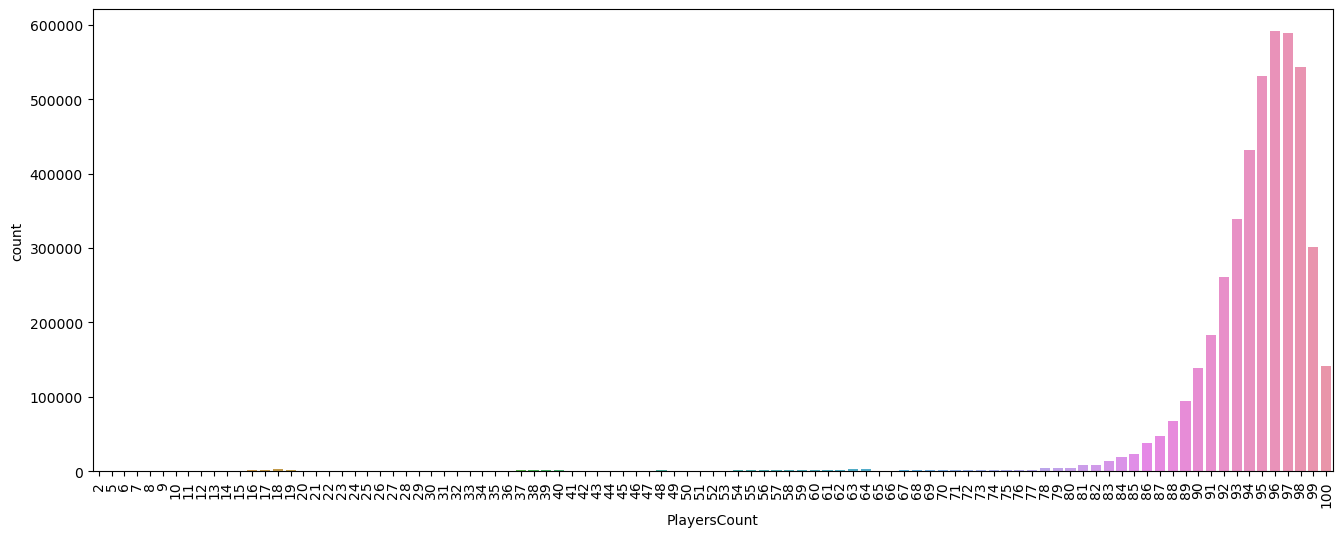

In [11]:
sns.countplot(data=df, x='PlayersCount')
plt.xticks(rotation=90)

**Analysing that how many players have played the match and how many times same number of players have played a particular match**

In [12]:
df['TotalDist']=df['rideDistance']+df['walkDistance']+df['swimDistance']

In [13]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersCount,TotalDist
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.00,0,0,244.80,1,1466,0.4444,96,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.00,0,0,161.80,2,0,0.7755,98,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.00,0,0,202.70,3,0,0.1667,91,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.00,0,0,49.75,2,0,0.1875,97,49.7500


In [14]:
df['Killswithoutmoving']=((df['TotalDist']==0) & (df['kills']>0))

In [15]:
df[df['Killswithoutmoving']]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersCount,TotalDist,Killswithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.600,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.000,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.800,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,1f3a6d69d22c7e,60b2849191c539,ff9cd80c0d8fb7,0,0,4.316,0,0,0,61,...,0.0,0,0,0.0,7,1500,0.8889,75,0.0,True
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.830,0,0,4,42,...,0.0,0,0,0.0,8,0,0.0000,49,0.0,True
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.100,7,2,16,26,...,0.0,0,0,0.0,7,1500,0.6000,47,0.0,True
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.400,9,2,0,18,...,0.0,1,0,0.0,16,1500,0.9000,47,0.0,True


In [16]:
df.drop(df[df['Killswithoutmoving']==True].index, inplace=True, axis=0)

In [17]:
df.shape

(4445430, 32)

**How Many Roadkills a person does?** that means killing from the moving object itself which is in itself a very difficult task. Hence More than 5 killings will be an anomaly nad hence we can just drop the rows where the killings are more than 5.

In [18]:
df[df['roadKills']>5]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersCount,TotalDist,Killswithoutmoving
39338,0097d2ae7a8576,b61edfa0c228d4,a786011fe206e9,1,2,495.7,4,0,0,2,...,0.000,0,0,72.80,1,0,0.9362,92,5202.8000,False
90312,0e6ea81fd1b9b3,1e96ac916d6fbb,3f150f3834422c,2,6,190.0,0,0,5,2,...,0.000,0,1,976.80,4,0,0.9556,89,4257.8000,False
197752,6cf1efa197bcc1,28df010b29a9e2,2e40495266529f,0,2,800.0,5,0,4,1,...,0.000,0,0,1516.00,3,0,0.6538,89,10085.0000,False
209676,5df28fce2b8128,32a01a5517635a,ee9fb50eb0fe00,0,3,360.0,2,0,4,1,...,0.000,0,0,36.96,0,0,1.0000,59,6142.9600,False
213544,612ee3024560a3,ab0162b0300c59,7c5535bfd43592,1,2,426.3,3,0,0,1,...,0.000,0,0,128.30,3,0,0.9167,96,3607.3000,False
217319,9ef0f556066da8,278849cc7a65de,348ff3a27810b7,0,0,700.0,0,0,0,2,...,7.440,0,0,1959.00,2,1512,0.3896,78,5444.4400,False
274649,5136fee873f4b1,63e7c4ac9dbdda,d7c0d6eb7ac88a,0,0,499.6,3,0,1,2,...,0.000,0,0,68.91,0,0,0.8333,93,4706.9100,False
348353,0f4f8a48c82788,08dd4375a984b4,893aa741790f12,0,0,366.7,1,0,0,1,...,0.000,0,0,492.80,2,0,0.9388,93,5764.8000,False
384553,aa419c2e3baada,7f4a9befdfa2a4,74d78cb420efdd,0,0,800.0,0,0,0,1,...,14.310,0,0,425.20,2,1594,0.3704,91,1189.4100,False
409898,67c84aae0c3d2c,de65dd2ff095c6,686416703ed45b,0,3,650.9,4,0,1,1,...,0.000,0,1,172.00,1,0,1.0000,95,4983.0000,False


In [19]:
df.drop(df[df['roadKills']>5].index, inplace=True, axis=0)

In [20]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersCount,TotalDist,Killswithoutmoving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,97,49.7500,False


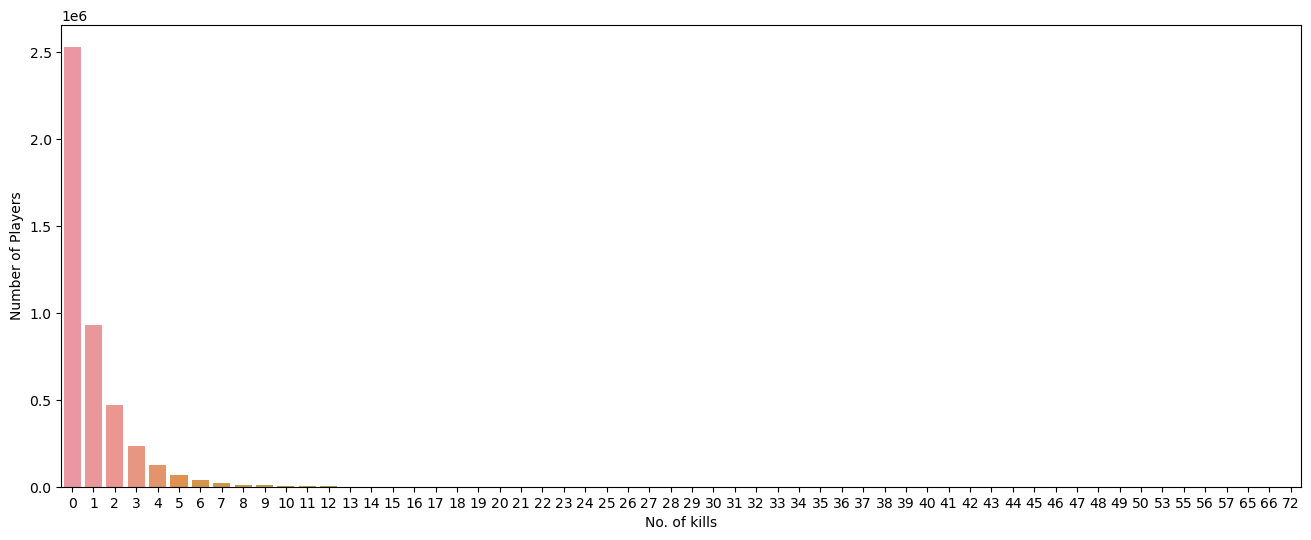

In [21]:
sns.countplot(data=df, x=df['kills'])
plt.xlabel('No. of kills')
plt.ylabel('Number of Players')
plt.show()

**How many Headshots a player can make?**. Making more than 10 headshots would also be considered an anomaly.

<Axes: xlabel='headshotKills', ylabel='count'>

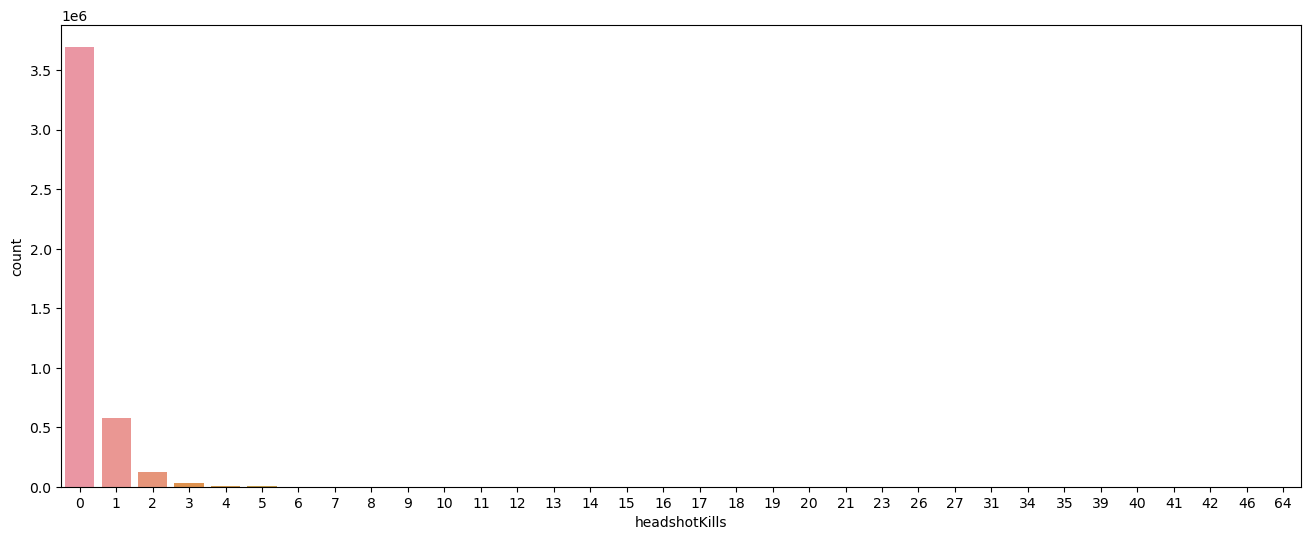

In [22]:
sns.countplot(data=df, x='headshotKills')

Most frequently occuring headshots are 1 2 and 3.

In [23]:
df.drop(df[df['headshotKills']>30].index, inplace=True, axis=0)

In [61]:
df['Headshotsimp']=((df['headshotKills']>10) & (df['PlayersCount']<30))

In [65]:
df.drop(df[df['Headshotsimp']].index, inplace=True, axis=0)

In [66]:
del df['Headshotsimp']

In [24]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersCount,TotalDist,Killswithoutmoving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,97,49.7500,False


In [25]:
data=df[df['kills']>=15]['kills']

<Axes: xlabel='kills', ylabel='count'>

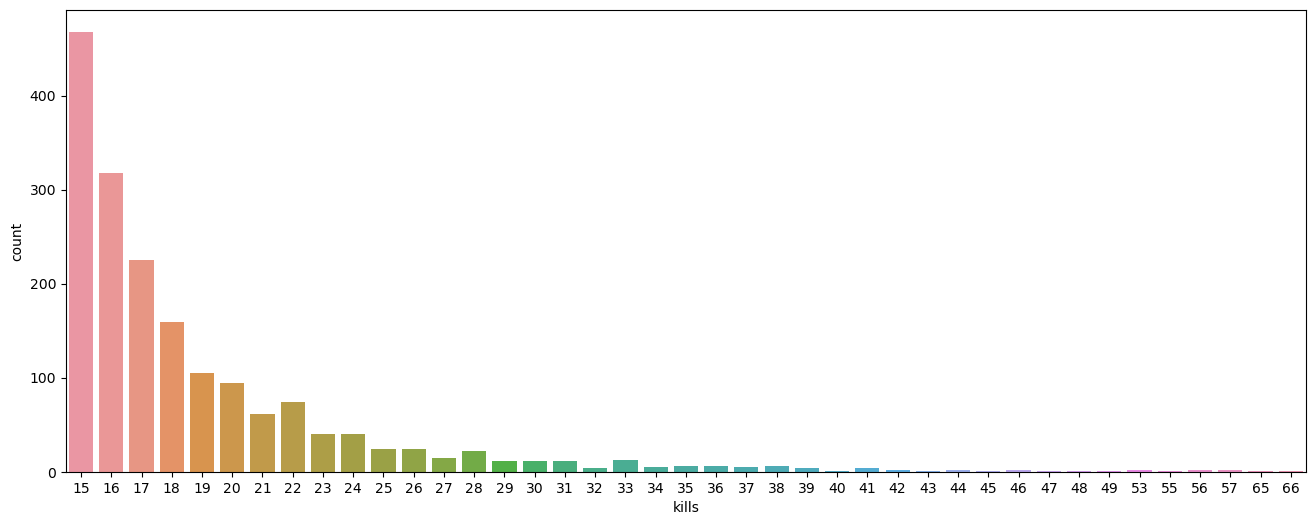

In [26]:
sns.countplot(x=data)

In [27]:
df[df['kills']>20].shape

(406, 32)

In [28]:
df.drop(df[df['kills']>20].index, inplace=True, axis=0)

In [29]:
df['Headshot_rate']=df['headshotKills']/df['kills']

Text(0, 0.5, 'Number of Players')

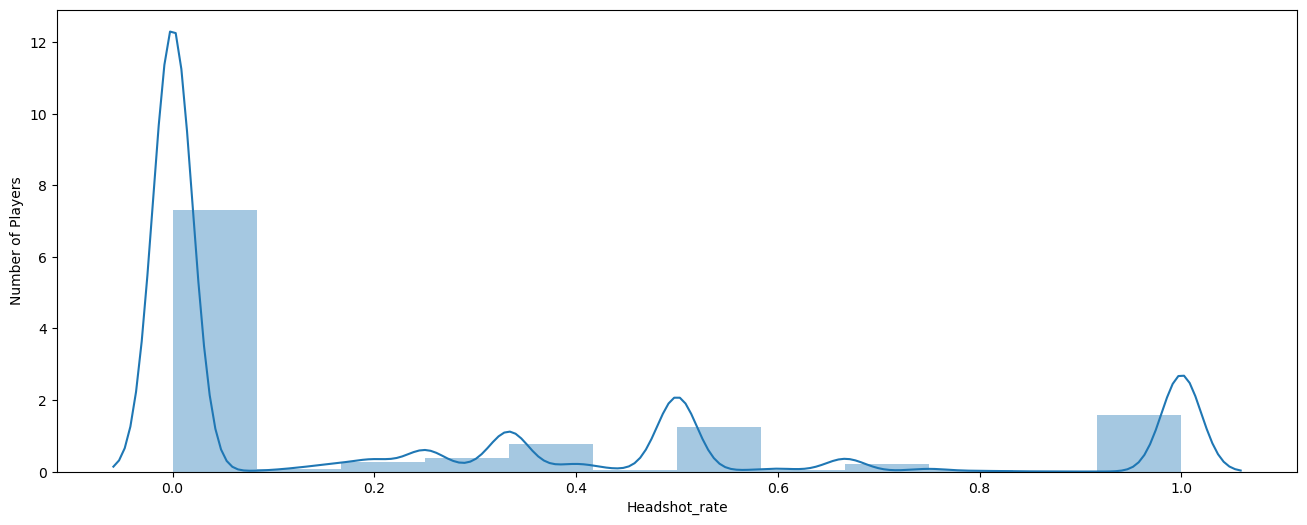

In [30]:
sns.distplot(df['Headshot_rate'], hist=True, kde=True, bins=12)
plt.ylabel('Number of Players')

In [31]:
index_to_drop=df[((df['Headshot_rate']==1)&(df['kills']>15))].index

In [32]:
df.drop(index_to_drop, inplace=True)

In [33]:
df.drop(df[df['longestKill']>500].index, inplace=True)